In [1]:
import numpy
#import modules.process_mouse_trials_lib as plib
import modules.traj_analysis as tran
import modules.io as io
import modules.helper_func_class as misc
import modules.plot_func as pltt
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg


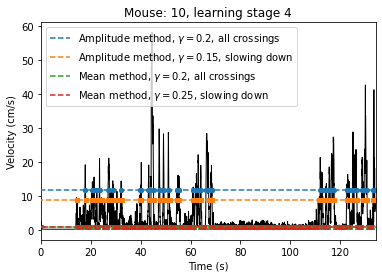

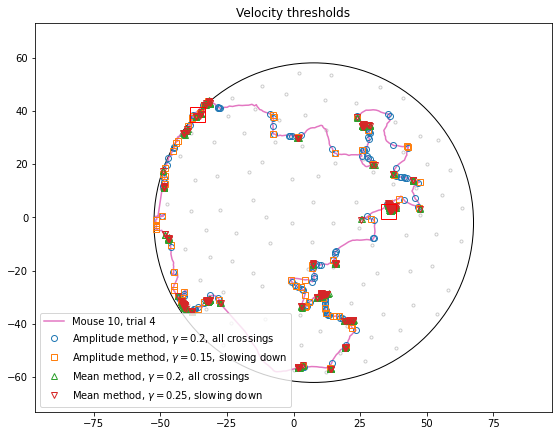

In [2]:
"""
############################################################################
############################################################################
############################################################################
###
###
###
### velocity crossing of a single mouse
###
###
###"""

# loading the data file and correcting the no-data gaps
mouse = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_4_startloc_SE_day_7.mat',fix_nan=True)

# calculate velocity crossing using the amplitude method (ampv) given by min(v) + gamma*(max(v) - min(v))
# returns all crossings
tind_cross_ampv_all,t_cross_ampv_all,IEI_ampv_all,v_th_ampv_all = tran.calc_velocity_crossings(mouse,threshold_method='ampv',gamma=0.2,only_slowing_down=False)
# returns only slowing downs
tind_cross_ampv_slo,t_cross_ampv_slo,IEI_ampv_slo,v_th_ampv_slo = tran.calc_velocity_crossings(mouse,threshold_method='ampv',gamma=0.15,only_slowing_down=True)

# calculate velocity crossing using the mean method (meanv) given by gamma*mean(v)
# returns all crossings
tind_cross_meanv_all,t_cross_meanv_all,IEI_meanv_all,v_th_meanv_all = tran.calc_velocity_crossings(mouse,threshold_method='meanv',gamma=0.2,only_slowing_down=False)
# returns only slowing downs
tind_cross_meanv_slo,t_cross_meanv_slo,IEI_meanv_slo,v_th_meanv_slo = tran.calc_velocity_crossings(mouse,threshold_method='meanv',gamma=0.25,only_slowing_down=True)

plt.figure()
ax = plt.gca()
colors = plt.get_cmap('tab10')(numpy.linspace(0,1,10))
ax.plot(mouse.time, mouse.velocity,'-k',linewidth=1,label='_')
lh1=pltt.plot_horizontal_lines(v_th_ampv_all,ax=ax,color=colors[0],linestyle='--',zorder=1000,label='Amplitude method, $\gamma=0.2$, all crossings')
lh2=pltt.plot_horizontal_lines(v_th_ampv_slo,ax=ax,color=colors[1],linestyle='--',zorder=1001,label='Amplitude method, $\gamma=0.15$, slowing down')
lh3=pltt.plot_horizontal_lines(v_th_meanv_all,ax=ax,color=colors[2],linestyle='--',zorder=1002,label='Mean method, $\gamma=0.2$, all crossings')
lh4=pltt.plot_horizontal_lines(v_th_meanv_slo,ax=ax,color=colors[3],linestyle='--',zorder=1003,label='Mean method, $\gamma=0.25$, slowing down')
ax.plot(t_cross_ampv_all,v_th_ampv_all*numpy.ones(t_cross_ampv_all.size),'o',color=colors[0],markersize=4,label='_')
ax.plot(t_cross_ampv_slo,v_th_ampv_slo*numpy.ones(t_cross_ampv_slo.size),'s',color=colors[1],markersize=4,label='_')
ax.plot(t_cross_meanv_all,v_th_meanv_all*numpy.ones(t_cross_meanv_all.size),'^',color=colors[2],markersize=4,label='_')
ax.plot(t_cross_meanv_slo,v_th_meanv_slo*numpy.ones(t_cross_meanv_slo.size),'v',color=colors[3],markersize=4,label='_')
ax.set_xlabel('Time (%s)'%mouse.unit_time)
ax.set_ylabel('Velocity (%s)'%mouse.unit_velocity)
ax.set_xlim((mouse.time[0],mouse.time[-1]))
ax.legend()
ax.set_title('Mouse: %s, learning stage %s' % (mouse.mouse_number,mouse.trial))

ax = pltt.plot_arena_sketch(mouse,showAllEntrances=False)
pltt.plot_mouse_trajectory(ax,mouse,'nose',show_start=True,show_target=True,color='tab:pink')
pltt.plot_trajectory_points(mouse.r_nose[tind_cross_ampv_all],ax=ax,linestyle='none',marker='o',fillstyle='none',color=colors[0],label='Amplitude method, $\gamma=0.2$, all crossings')
pltt.plot_trajectory_points(mouse.r_nose[tind_cross_ampv_slo],ax=ax,linestyle='none',marker='s',fillstyle='none',color=colors[1],label='Amplitude method, $\gamma=0.15$, slowing down')
pltt.plot_trajectory_points(mouse.r_nose[tind_cross_meanv_all],ax=ax,linestyle='none',marker='^',fillstyle='none',color=colors[2],label='Mean method, $\gamma=0.2$, all crossings')
pltt.plot_trajectory_points(mouse.r_nose[tind_cross_meanv_slo],ax=ax,linestyle='none',marker='v',fillstyle='none',color=colors[3],label='Mean method, $\gamma=0.25$, slowing down')
ax.legend()
ax.set_title('Velocity thresholds')
plt.show()

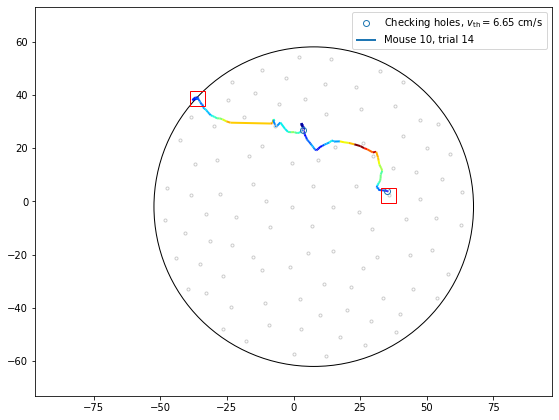

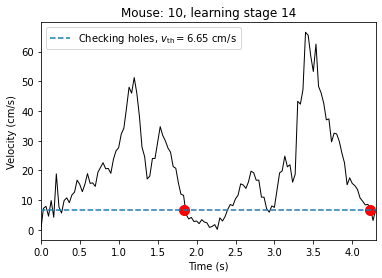

In [3]:
"""
############################################################################
############################################################################
############################################################################
###
###
###
### slowing down next to holes
###
###
###"""

#mouse = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_4_startloc_SE_day_7.mat',remove_after_food=True) # trajectory gaps are now automatically fixed
mouse = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_14_startloc_SE_day_12.mat',remove_after_food=True) # trajectory gaps are now automatically fixed

hole_horizon = 2.0 # in cm (units is mouse.unit_r)
tind,t,r,v_th = tran.find_slowing_down_close_to_hole(mouse,hole_horizon,threshold_method='ampv',gamma=0.1,return_pos_from='mouse')

ax = pltt.plot_arena_sketch(mouse,showAllEntrances=False)
pltt.plot_mouse_trajectory(ax,mouse,'nose',show_start=True,show_target=True,color=plt.get_cmap('jet'),line_gradient_variable='velocity',linewidth=2)
pltt.plot_trajectory_points(mouse.r_nose[tind],ax=ax,linestyle='none',marker='o',fillstyle='none',color=colors[0],label='Checking holes, $v_{\\rm th}=%.2f$ %s'%(v_th,mouse.unit_velocity))
plt.legend()

plt.figure()
ax = plt.gca()
ax.plot(mouse.time, mouse.velocity,'-k',linewidth=1,label='_')
pltt.plot_horizontal_lines(v_th,ax=ax,color=colors[0],linestyle='--',zorder=1000,label='Checking holes, $v_{\\rm th}=%.2f$ %s'%(v_th,mouse.unit_velocity))
ax.plot(mouse.time[tind],v_th*numpy.ones(tind.size),'o',color='r',markersize=10,label='_',linewidth=2)
ax.set_xlabel('Time (%s)'%mouse.unit_time)
ax.set_ylabel('Velocity (%s)'%mouse.unit_velocity)
ax.set_xlim((mouse.time[0],mouse.time[-1]))
ax.legend()
ax.set_title('Mouse: %s, learning stage %s' % (mouse.mouse_number,mouse.trial))
plt.show()

 
 
-
Available fields in the data file:
 
file_name; exper_date; file_trial_idx; day; trial; trial_id; trial_name; mouse_number; start_location; r_target; r_target_reverse; r_start; arena_diameter; r_arena_holes; r_arena_center; arena_picture; arena_picture_wh; is_reverse; arena_pic_left; arena_pic_right; arena_pic_bottom; arena_pic_top; time; r_center; r_nose; r_tail; direction; velocity; unit_time; unit_r; unit_direction; unit_velocity
you can call mouse.FIELD_NAME after loading the data with plib.load_trial_file function
for FIELD_NAME equal to any of the fields above
 
-
 Mouse: 10, trial (learning stage) 14
     deviation angle = 69.4275 +/- 80.8793   [avg +/- std]
     original file = 2019-09-06_Raw Trial Data\Raw data-Hidden Food Maze-06Sept2019-Trial    66.xlsx
-
 
 


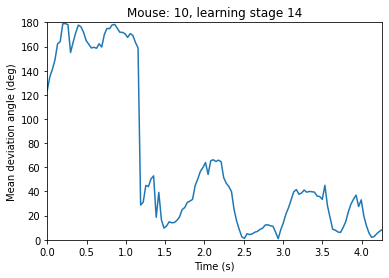

In [4]:
"""
############################################################################
############################################################################
############################################################################
###
###
###
### deviation for a single mouse as an example
###
###
###"""

# loading the data file and correcting the no-data gaps
#mouse = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_4_startloc_SE_day_7.mat',fix_nan=True,remove_after_food=True)
mouse  = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_14_startloc_SE_day_12.mat',fix_nan=True,remove_after_food=True)

# calculating the deviation from food vector (i.e., the cosine of the angle, NOT the angle)
deviation = tran.calc_mouse_deviation(mouse,absolute_food_vec=False)

# calculating the time average for each learning stage
deviation_tavg = numpy.nanmean(deviation) # the time average is the average over time of the average over mice
deviation_tstd = numpy.nanstd(deviation)  # the "mean standard deviation" is the sqrt of the mean variance

# calculating the angle over time for all mice and learning stages
angle = numpy.arccos(deviation)*180.0/numpy.pi

# calculating the angle from the deviation and propagating the error for the time avg of the mouse avg for each learning stage
angle_tavg = numpy.arccos(deviation_tavg)*180.0/numpy.pi
angle_tstd = (180.0/numpy.pi)*numpy.sqrt(1.0/numpy.abs(1.0-deviation_tstd**2.0) * deviation_tstd**2.0) # error propagation from the cosine to the angle ( arccos(deviation) ), d(arccos x)/dx = -1/sqrt(1-x**2)

print(' ')
print(' ')
print('-')
print('Available fields in the data file:')
print(' ')
print(mouse.GetFields())
print('you can call mouse.FIELD_NAME after loading the data with io.load_trial_file function')
print('for FIELD_NAME equal to any of the fields above')
print(' ')
print('-')
print(' Mouse: %s, trial (learning stage) %s' % (mouse.mouse_number,mouse.trial))
print('     deviation angle = {:g} +/- {:g}   [avg +/- std]'.format(angle_tavg,angle_tstd))
print('     original file = %s'%mouse.file_name)
print('-')
print(' ')
print(' ')

fig,ax = plt.subplots(nrows=1,ncols=1)
Delta_t = mouse.time[1] - mouse.time[0] # time precision
time = numpy.arange(angle.size) * Delta_t
ax.plot(time,angle,'-',label='Mouse: %s' % mouse.mouse_number)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean deviation angle (deg)')
ax.set_title('Mouse: %s, learning stage %s' % (mouse.mouse_number,mouse.trial))
ax.set_xlim((time[0],time[-1]))
ax.set_ylim((0,180))
plt.show()

Text(0.5, 1.0, 'time window = 1.00 s')

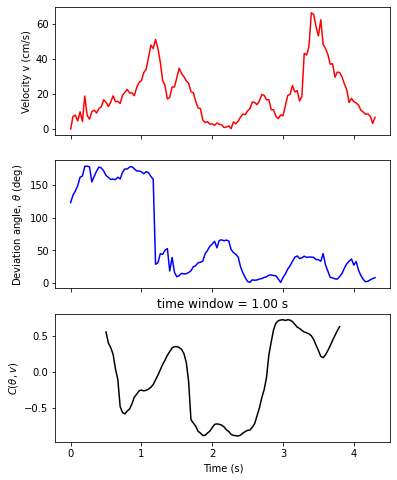

In [5]:
"""
############################################################################
############################################################################
############################################################################
###
###
###
### deviation-velocity correlation for a single mouse as an example
###
###
###"""

# loading the data file and correcting the no-data gaps
#mouse = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_4_startloc_SE_day_7.mat',fix_nan=True,remove_after_food=True)
mouse  = io.load_trial_file(r'./experiments/relative_target/mouse_10/mpos_06Sept2019_trial_14_startloc_SE_day_12.mat',fix_nan=True,remove_after_food=True)

# mouse deviation
theta = numpy.arccos(tran.calc_mouse_deviation(mouse,absolute_food_vec=False, return_angle=False)) * 180.0 / numpy.pi

# sliding correlation within a 2.0 seconds window
time_window = 1.0 # seconds
R = tran.calc_deviation_angle_vs_velocity_corr(mouse,time_window,absolute_food_vec=False)

fig,ax = plt.subplots(nrows=3,ncols=1,sharex=True,figsize=(6,8))
ax[0].plot(mouse.time,mouse.velocity,'-r')
ax[1].plot(mouse.time,theta,'-b')
ax[2].plot(mouse.time,R,'-k')

ax[2].set_xlabel('Time (%s)'%mouse.unit_time)
ax[0].set_ylabel('Velocity v (%s)'%mouse.unit_velocity)
ax[1].set_ylabel('Deviation angle, $\\theta$ (deg)')
ax[2].set_ylabel('$C(\\theta,v)$')
ax[2].set_title('time window = %.2f %s'%(time_window,mouse.unit_time))

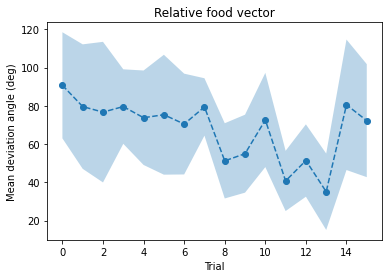

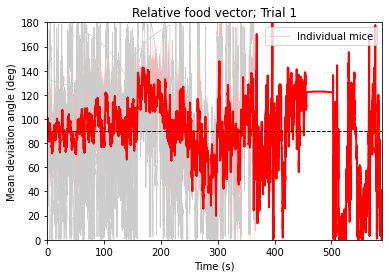

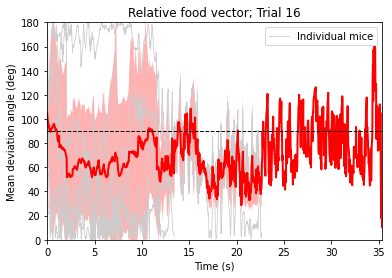

In [6]:
"""
############################################################################
############################################################################
############################################################################
###
###
###
### deviation for all the relative target mice at once
###
###
###"""
mouse_traj_dir = [r'./experiments/relative_target/mouse_9',
                  r'./experiments/relative_target/mouse_10',
                  r'./experiments/relative_target/mouse_11',
                  r'./experiments/relative_target/mouse_12',
                  r'./experiments/relative_target/mouse_13',
                  r'./experiments/relative_target/mouse_14',
                  r'./experiments/relative_target/mouse_15',
                  r'./experiments/relative_target/mouse_16' ]

# loads experiment MAT files from file path according to the parameters
#
# load_only_training_sessions -> if True, skips all rotated trials (RXXX_Y trials), loads only standard 1 to 17 or 1 to 14 trials
# skip_15 -> if True, skips trial 15 (since it was a probe trial without food)
# use_extra_trials -> if True, returns all 1 to 17 trials (15 is treated according to parameter above); otherwise returns from 1 to 14
# sort_by_trial -> if True, then the return list of files is sorted according to the trial number
#
# each loaded data file then goes through the fill_trajectory_nan_gaps function
# where the r_nose, r_center and r_tail are linearly interpolated over the missing data intervals (nan gaps)
# and the velocity is assumed constant over these gap intervals (since the position is linear with time)
# this interpolation of r and v is important because you want to calculate the mouse vector and velocity thresholds over all the recording time
mouse = [ io.load_trial_file(tr,load_only_training_sessions_relative_target=True,skip_15_relative_target=True,use_extra_trials_relative_target=True,sort_by_trial=True,fix_nan=True,remove_after_food=True) for tr in mouse_traj_dir ]

# mouse[0] -> all files of mouse 9; mouse[1] -> all files of mouse 10; etc
# mouse[0][0] -> trial 1 of mouse 9; mouse[0][1] -> trial 2 of mouse 9; etc (trial here is the learning stage)

use_absolute_food_vector = False

# The deviation list will have its indices flipped relative to the mouse list above
# such that deviation[j][i] corresponds to the time series of trial j of mouse i
# this is because we want to average over mice, so it helps if the mouse index is the second one
deviation = [ misc.get_empty_list(len(mouse)) for j in range(len(mouse[0])) ] # creating one list of learning stages
for i,m in enumerate(mouse): # for each mouse
    for j,tr in enumerate(m): # for each trial of mouse m
        deviation[j][i] = tran.calc_mouse_deviation(tr,absolute_food_vec=use_absolute_food_vector)

# converting the deviation list into a list of arrays (tables)
# such that each column in deviation[i] is now the deviation time series of mouse i
# this conversion is necessary to facilitate the calculation of avg over mice below by using numpy
deviation = [ misc.asarray_nanfill(d).T for d in deviation ]

# we use nanmean to ignore nan values
# we use axis=1 to mean that the averge is over columns (i.e., over mice) of the data table in deviation[i]
deviation_mavg = [ numpy.nanmean(d,axis=1) for d in deviation  ] # calculating the avg over mice (mavg) for each learning stage
deviation_mstd = [ numpy.nanstd(d,axis=1) for d in deviation  ] # calculating the avg over mice (mavg) for each learning stage

# calculating the time average for each learning stage
deviation_tavg = numpy.asarray([ numpy.nanmean(d) for d in deviation_mavg ]) # the time average is the average over time of the average over mice
deviation_tstd = numpy.asarray([ numpy.sqrt(numpy.nanmean(d**2)) for d in deviation_mstd ]) # the "mean standard deviation" is the sqrt of the mean variance

# calculating the angle over time for all mice and learning stages
angle = [ numpy.arccos(d)*180.0/numpy.pi for d in deviation ]

# calculating the angle from the deviation and propagating the error for the mouse avg
angle_mavg = [ numpy.arccos(d)*180.0/numpy.pi for d in deviation_mavg ]
angle_mstd = [ (180.0/numpy.pi)*numpy.sqrt(1.0/numpy.abs(1.0-d**2.0) * d**2.0) for d in deviation_mstd ] # error propagation from the cosine to the angle ( arccos(deviation) ), d(arccos x)/dx = -1/sqrt(1-x**2)

# calculating the angle from the deviation and propagating the error for the time avg of the mouse avg for each learning stage
angle_tavg = numpy.arccos(deviation_tavg)*180.0/numpy.pi
angle_tstd = (180.0/numpy.pi)*numpy.sqrt(1.0/numpy.abs(1.0-deviation_tstd**2.0) * deviation_tstd**2.0) # error propagation from the cosine to the angle ( arccos(deviation) ), d(arccos x)/dx = -1/sqrt(1-x**2)


panel_title = 'Absolute food vector' if use_absolute_food_vector else 'Relative food vector'
fig_filename_suffix = 'abs' if use_absolute_food_vector else 'rel'

# plotting the time avg of mouse average versus learning stage
plt.figure()
ax = plt.gca()
pltt.plot_errorfill(numpy.arange(angle_tavg.size),angle_tavg,angle_tstd,fmt='--o',ax=ax)
ax.set_xlabel('Trial')
ax.set_ylabel('Mean deviation angle (deg)')
ax.set_title(panel_title)
plt.savefig('example_fig/angle_avg_vs_learning_' + fig_filename_suffix + '.png', dpi=300)

# plotting the avg angle over mice versus time for learning stage 1
plt.figure()
Delta_t = mouse[0][0].time[1] - mouse[0][0].time[0] # time precision
time = numpy.arange(angle_mavg[0].shape[0])*Delta_t
ax = plt.gca()
lh_m = plt.plot(time,angle[0],'-',c=(0.8,0.8,0.8,1),linewidth=0.8)
pltt.plot_errorfill(time,angle_mavg[0],angle_mstd[0],fmt='-',color='r',ax=ax,markersize=3,linewidth=2,label='Average')
pltt.plot_horizontal_lines(90,ax=ax,linewidth=1,color='k',linestyle='--',zorder=1000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean deviation angle (deg)')
#ax.set_title()
ax.set_xlim((time[0],time[-1]))
ax.set_ylim((0,180))
ax.set_title(panel_title + '; Trial 1')
ax.legend([lh_m[0]],['Individual mice'])
plt.savefig('example_fig/angle_avg_vs_time_learning1_' + fig_filename_suffix + '.png', dpi=300)

# plotting the avg angle over mice versus time for last learning stage
plt.figure()
time = numpy.arange(angle_mavg[-1].shape[0])*Delta_t
ax = plt.gca()
lh_m = plt.plot(time,angle[-1],'-',c=(0.8,0.8,0.8,1),linewidth=0.8)
pltt.plot_errorfill(time,angle_mavg[-1],angle_mstd[-1],fmt='-',color='r',ax=ax,markersize=3,linewidth=2,label='Average')
pltt.plot_horizontal_lines(90,ax=ax,linewidth=1,color='k',linestyle='--',zorder=1000)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean deviation angle (deg)')
#ax.set_title()
ax.set_xlim((time[0],time[-1]))
ax.set_ylim((0,180))
ax.set_title(panel_title + '; Trial 16')
ax.legend([lh_m[0]],['Individual mice'])
plt.savefig('example_fig/angle_avg_vs_time_learning16_' + fig_filename_suffix + '.png', dpi=300)

plt.show()